In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
ruta_archivo = '/Users/carli/Desktop/Metodos/Ati_anonimo.xlsx'
df = pd.read_excel(ruta_archivo)
df.columns = df.columns.str.strip()  # Limpiar nombres de columnas
print(df.head())  # Verificar los datos


In [ ]:
#Buscar duplicados en DNI y NRO. INSCR

mask_dup= df.duplicated(subset=['DNI', 'NRO. INSCR'],keep=False)
#print(mask_duplicados)

duplicados = df[df.duplicated(subset=['DNI', 'NRO. INSCR'], keep=False)]
print("Duplicados encontrados:")
print(duplicados)




In [ ]:
sum(df.COMISION[mask_dup].str.contains('B')) # Comision B

for i in df.DNI[mask_dup]:
    print(i)
    if len(df.NOTA[df.DNI == i].unique()) > 1:
        set(df.NOTA[df.DNI == i].values)
        print(df.NOTA[df.DNI == i].values)
        print('----------------------------------')   #no se imprime la raya larga,lo q significa q siempre aparecen todos los dupli con la misma nota,no es q la misma persona tiene notas distintas
                           

In [ ]:
for i in df.DNI[mask_dup]:
    print(i)
    if len(df.COMISION[df.DNI== i].unique()) > 1:
        #set(df.NOTA[df.DNI == i].values)
        print(df.COMISION[df.DNI== i].values)
        print('----------------------------------') 

<Axes: xlabel='NOTA'>

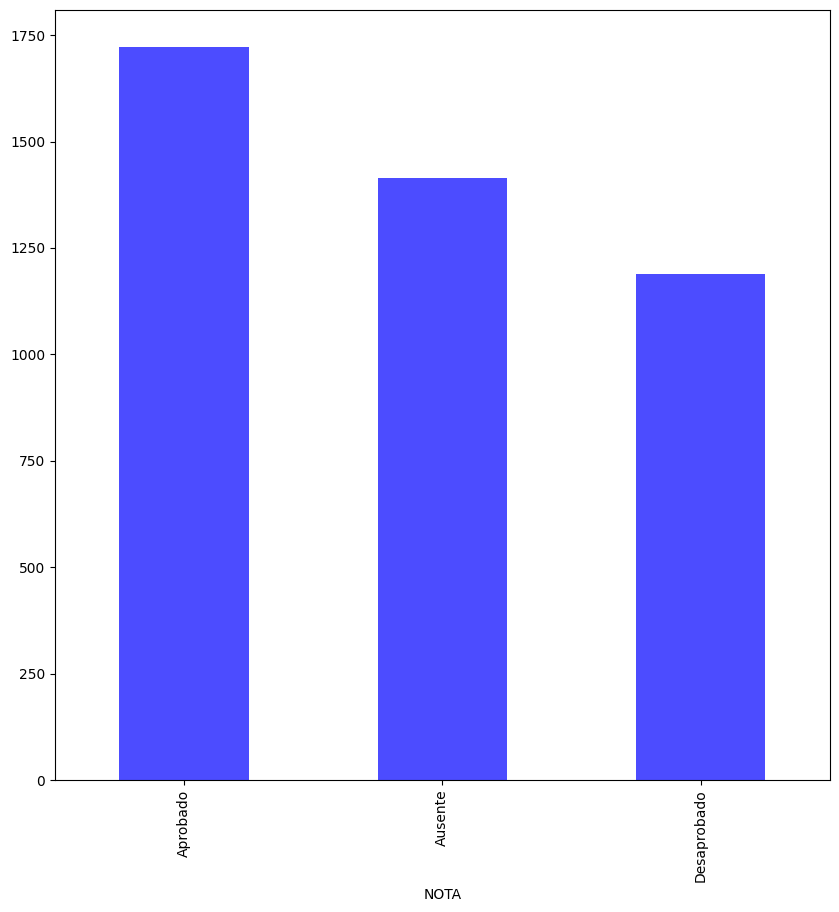

In [16]:
#GRAFICOS DE APROBADOS,DESAPROBADOS Y AUSENTES
#df.NOTA.value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=90)
df.NOTA.value_counts().plot.bar(figsize=(10, 10), color='blue', alpha=0.7)


<Axes: ylabel='count'>

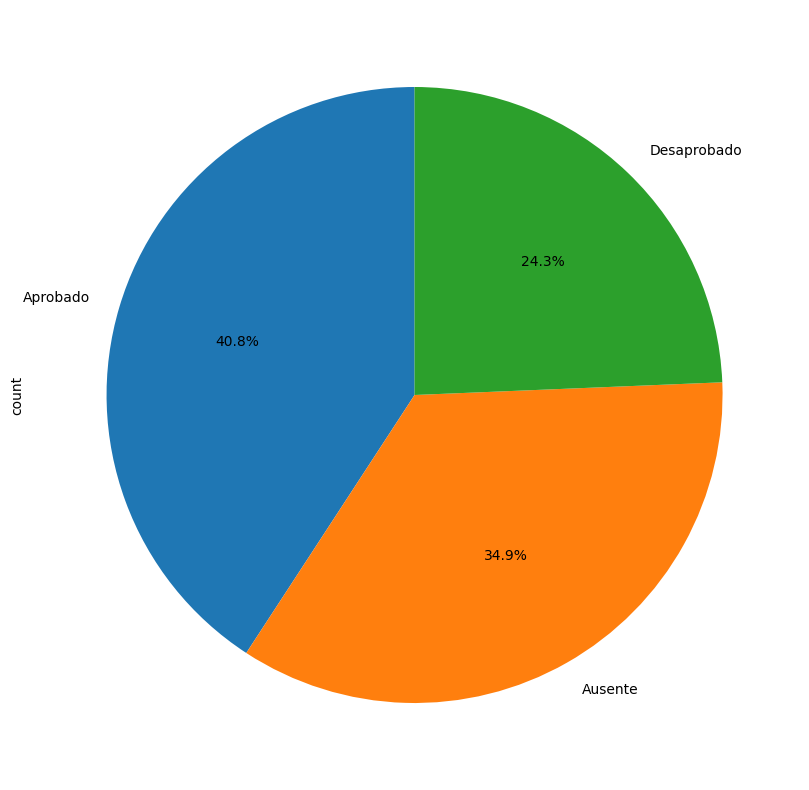

In [9]:
#GRAFICO SOLO PARA LA COMISION B
df.NOTA[df.COMISION.str.contains('B')].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=90)


2728
1598


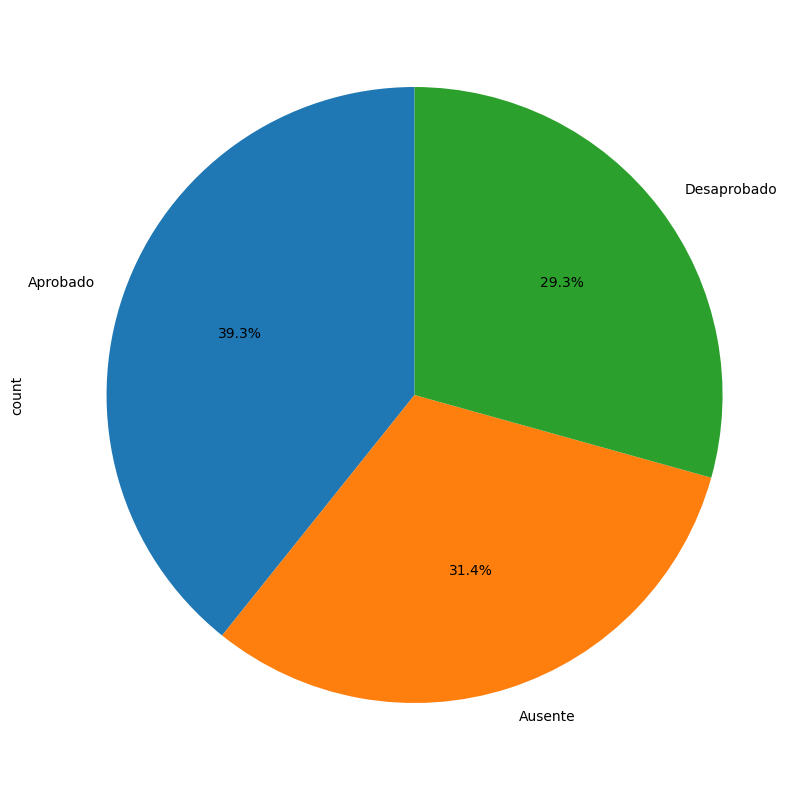

In [10]:
#GRAFICO DE COMISION M 
df.NOTA[df.COMISION.str.contains('M')].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=90)
print(sum(df.COMISION.str.contains('M'))) # Comision M
print(sum(df.COMISION.str.contains('B'))) # Comision B

Carrera-Nom
Agrimensura                                                                    9
Arquitectura                                                                 207
Bioquímica                                                                    91
Contador Público                                                             159
Farmacia                                                                      69
Ing. Agronómica                                                               72
Ing. Civil                                                                    49
Ing. Electricista                                                              7
Ing. Electrónica                                                              28
Ing. Industrial                                                              118
Ing. Mecánica                                                                 29
Ing. Química                                                                  83
Ing. en Alimento

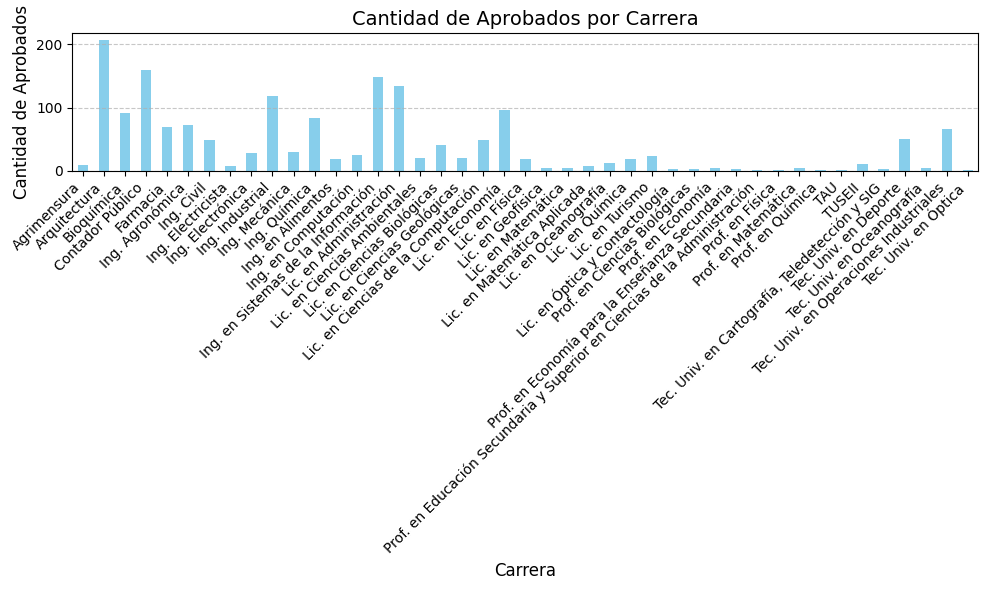

In [11]:
#FILTRAR POR CARRERA Y CONTAR APROBADOS
aprobados_por_carrera = df[df['NOTA'] == 'Aprobado'].groupby('Carrera-Nom').size()
print(aprobados_por_carrera)


plt.figure(figsize=(10, 6))  # Tamaño del gráfico
aprobados_por_carrera.plot(kind='bar', color='skyblue')

# Personaliza el gráfico
plt.title('Cantidad de Aprobados por Carrera', fontsize=14)
plt.xlabel('Carrera', fontsize=12)
plt.ylabel('Cantidad de Aprobados', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rota etiquetas para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Muestra el gráfico
plt.tight_layout()
plt.show()

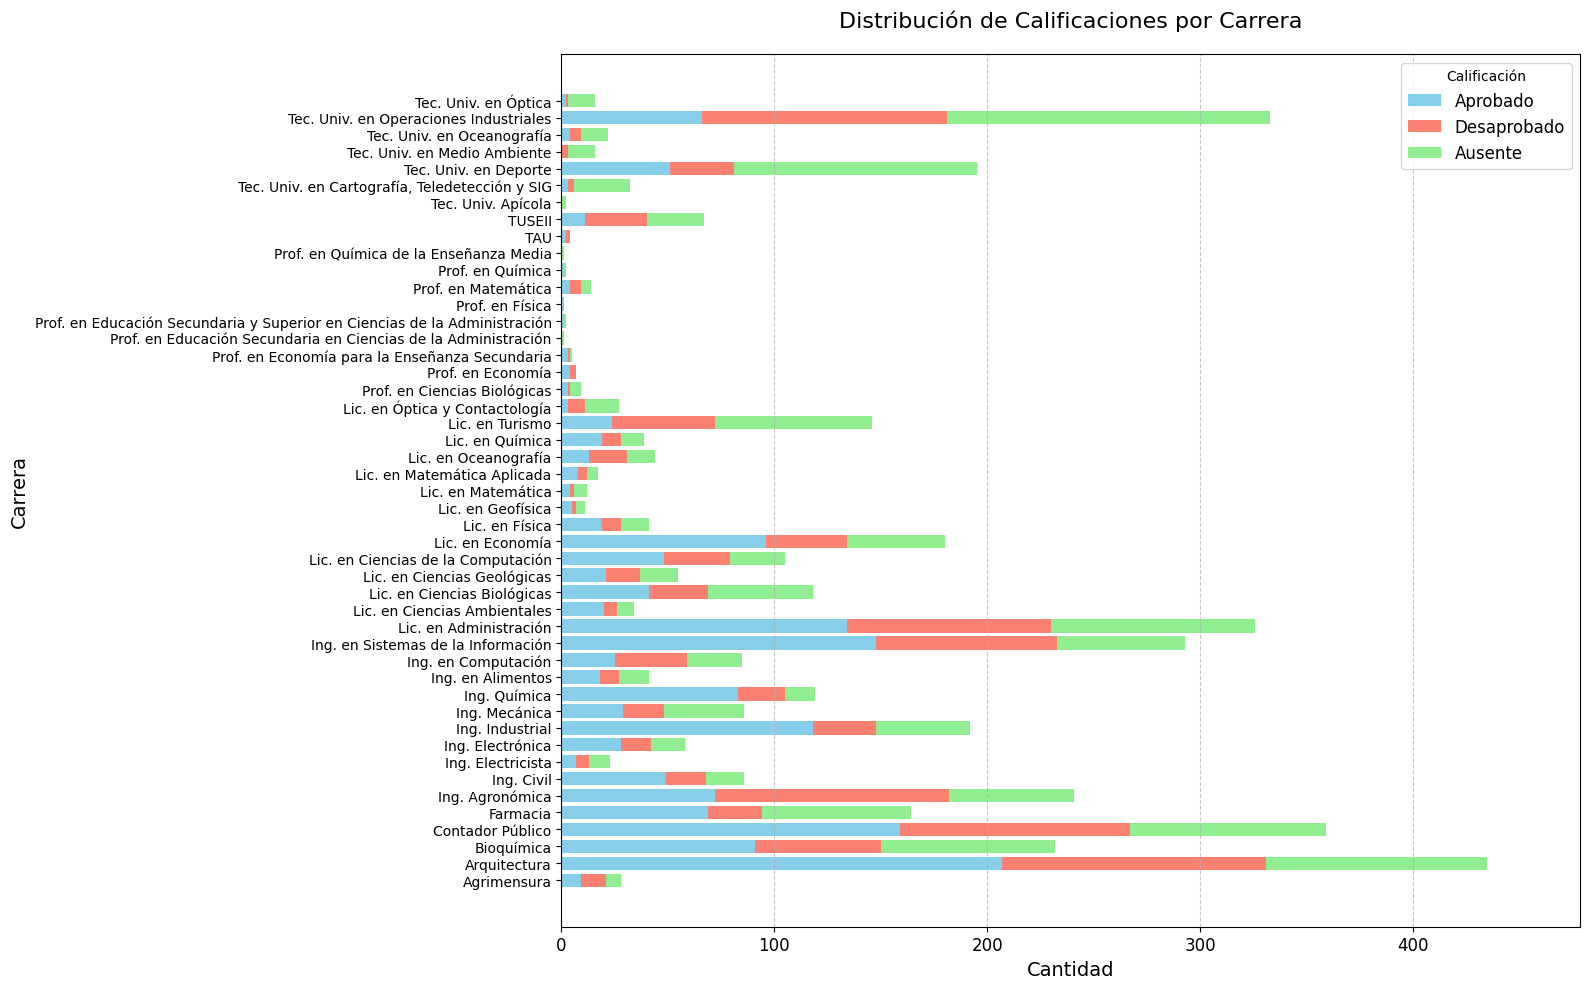

                                                    Aprobado  Desaprobado  \
Carrera-Nom                                                                 
Agrimensura                                                9            7   
Arquitectura                                             207          104   
Bioquímica                                                91           82   
Contador Público                                         159           92   
Farmacia                                                  69           70   
Ing. Agronómica                                           72           59   
Ing. Civil                                                49           18   
Ing. Electricista                                          7           10   
Ing. Electrónica                                          28           16   
Ing. Industrial                                          118           44   
Ing. Mecánica                                             29           38   

In [13]:
#DISTRIBUCION POR CARRERA HORIZONTAL


# Agrupa por carrera y calificación, contando las ocurrencias
resumen = df.groupby(['Carrera-Nom', 'NOTA']).size().unstack(fill_value=0)

# Define colores para cada estado
colores = {'Aprobado': 'skyblue', 'Desaprobado': 'salmon', 'Ausente': 'lightgreen'}

# Prepara los datos para el gráfico
carreras = resumen.index
estados = ['Aprobado', 'Desaprobado', 'Ausente']
valores = [resumen.get(estado, pd.Series(0, index=carreras)).values for estado in estados]

# Crea el gráfico de barras horizontales apiladas
plt.figure(figsize=(16, 10))  # Ancho y alto para legibilidad
left = np.zeros(len(carreras))  # Acumula los valores para apilar

for i, estado in enumerate(estados):
    plt.barh(carreras, valores[i], left=left, color=colores.get(estado, 'gray'), label=estado, height=0.8)
    left += valores[i]  # Actualiza el punto de inicio para la siguiente sección

# Personaliza el gráfico
plt.title('Distribución de Calificaciones por Carrera', fontsize=16, pad=20)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Carrera', fontsize=14)
plt.yticks(fontsize=10)  # Etiquetas de carreras
plt.xticks(fontsize=12)
plt.legend(title='Calificación', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajusta el margen para dar más espacio
plt.margins(x=0.1)  # 10% de espacio extra en el eje X

# Ajusta el diseño y muestra
plt.tight_layout()
plt.show()

i

# Agrupa por carrera y calificación, contando las ocurrencias
tabla = df.groupby(['Carrera-Nom', 'NOTA']).size().unstack(fill_value=0)

# Renombra las columnas para mayor claridad (opcional)
tabla.columns = ['Aprobado', 'Desaprobado', 'Ausente']

# Agrega una columna con el total por carrera
tabla['Total'] = tabla.sum(axis=1)

# Muestra la tabla
print(tabla)





In [14]:
#20 CARRERAS MAS CONCURRIDAS

# Agrupa por carrera y cuenta el total de alumnos (independiente de la calificación)
total_por_carrera = df.groupby('Carrera-Nom').size().sort_values(ascending=False)

# Selecciona las 20 carreras más numerosas
top_20_carreras = total_por_carrera.head(20)

# Convierte a DataFrame para una mejor presentación
tabla_top_20 = pd.DataFrame(top_20_carreras, columns=['Total Alumnos'])

# Muestra la tabla
print(tabla_top_20)



                                        Total Alumnos
Carrera-Nom                                          
Arquitectura                                      435
Contador Público                                  359
Tec. Univ. en Operaciones Industriales            333
Lic. en Administración                            326
Ing. en Sistemas de la Información                293
Ing. Agronómica                                   241
Bioquímica                                        232
Tec. Univ. en Deporte                             195
Ing. Industrial                                   192
Lic. en Economía                                  180
Farmacia                                          164
Lic. en Turismo                                   146
Ing. Química                                      119
Lic. en Ciencias Biológicas                       118
Lic. en Ciencias de la Computación                105
Ing. Civil                                         86
Ing. Mecánica               

In [15]:


# Agrupa por comisión y calificación, contando las ocurrencias
tabla = df.groupby(['COMISION', 'NOTA']).size().unstack(fill_value=0)

# Renombra las columnas para mayor claridad (opcional)
tabla.columns = ['Aprobado', 'Desaprobado', 'Ausente']

# Agrega una columna con el total por comisión
tabla['Total'] = tabla.sum(axis=1)

# Muestra la tabla
print(tabla)



          Aprobado  Desaprobado  Ausente  Total
COMISION                                       
B1              83           59       70    212
B2              63           57       42    162
B3              55           62       57    174
B4              76           52       41    169
B5              86           58       33    177
B6              80           62       42    184
B7              57           67       52    176
B8              88           48       29    165
B9              64           92       23    179
M1              86           54       46    186
M10             84           43       26    153
M11             46           64       36    146
M12             55           63       43    161
M16             56           65       46    167
M17             77           30       44    151
M2              55           68       42    165
M21             66           44       53    163
M22             60           42       45    147
M23             57           52       56